In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import random
import time

In [3]:
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples=50, n_features=1, noise=4, random_state=42)
print(X.shape)
print(y.shape)

(50, 1)
(50,)


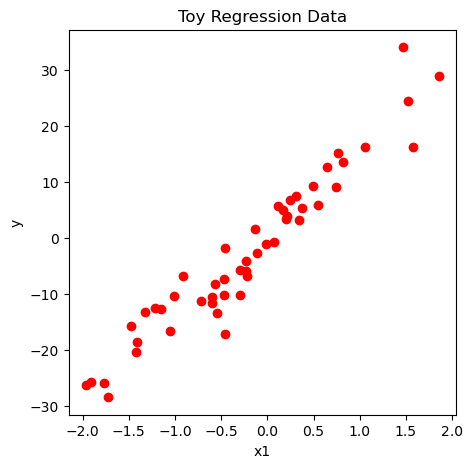

In [5]:
plt.figure(figsize=(5,5))

plt.scatter(x=X[:, 0], y=y, c='r')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Toy Regression Data')

plt.show()

In [6]:
X

array([[-0.29169375],
       [-1.91328024],
       [ 0.31424733],
       [ 0.54256004],
       [ 1.57921282],
       [ 0.24196227],
       [ 0.76743473],
       [-1.47852199],
       [ 0.19686124],
       [-0.56228753],
       [ 1.05712223],
       [-1.15099358],
       [-0.46947439],
       [-0.60170661],
       [-0.2257763 ],
       [ 0.82254491],
       [-1.4123037 ],
       [-0.60063869],
       [-0.23415337],
       [-0.54438272],
       [-1.95967012],
       [-0.46341769],
       [ 1.52302986],
       [-1.05771093],
       [-0.23413696],
       [ 0.11092259],
       [-0.11564828],
       [ 1.46564877],
       [-1.22084365],
       [-0.90802408],
       [-0.01349722],
       [ 0.49671415],
       [-0.71984421],
       [ 0.0675282 ],
       [ 0.37569802],
       [ 0.17136828],
       [-1.76304016],
       [-1.01283112],
       [ 0.2088636 ],
       [ 0.64768854],
       [-0.1382643 ],
       [-1.32818605],
       [-0.46572975],
       [ 0.73846658],
       [ 0.34361829],
       [-0

In [7]:
y

array([-10.09088705, -25.77650803,   7.61088804,   6.00445213,
        16.22232105,   6.74901624,  15.21360235, -15.74102208,
         3.47646489,  -8.22720841,  16.27948482, -12.60615782,
        -7.32695988, -11.63653711,  -6.86329824,  13.59744375,
       -18.55005545, -10.60212   ,  -4.12845185, -13.34667319,
       -26.35844776,  -1.81181254,  24.4831714 , -16.61318447,
        -5.7934665 ,   5.73313447,  -2.65628519,  34.1437267 ,
       -12.57189791,  -6.8145219 ,  -1.03885428,   9.32839688,
       -11.3121594 ,  -0.64291757,   5.37049653,   5.10749623,
       -26.00205418, -10.38138993,   3.97186151,  12.70482985,
         1.60251489, -13.22991042, -10.15609221,   9.16962886,
         3.26034831, -17.11222037,  29.07793189, -28.45959038,
       -20.32160974,  -5.71458339])

In [8]:
# Todo: Find the parameters of the best-fit line/hyperplane using Gradient Descent.

In [9]:
indices = np.array([5,3,2])
np.take(y, indices)

array([6.74901624, 6.00445213, 7.61088804])

In [10]:
class Sampler:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.start_index = 0
        
    def sample_data(self, batch_size, sample_strategy='random_with_replacement',
                   wrap_index_overflow=True):
        # n is total number of datapoints
        n = X.shape[0]

        if batch_size == n and sample_strategy == 'systematic_sampling':
            # Get all data points from the training dataset.

            return (np.arange(n), self.X, self.y)
        else:
            # Get batch_size number of data points from the training dataset.

            if sample_strategy == 'random_with_replacement':
                # Generate batch_size number of indices randomly with replacement.
                indices = np.random.randint(low=0, high=n, size=batch_size)
            elif sample_strategy == 'random_without_replacement':
                # Generate batch_size number of indices randomly without replacement.
                indices = np.array(random.sample(range(0, n), batch_size))
            elif sample_strategy == 'systematic_sampling':
                # Generate batch_size number of indices systematically.
                temp_indices = []
                j = self.start_index
                for i in range(self.start_index, self.start_index+batch_size):
                    if j == n:
                        if not wrap_index_overflow:
                            break
                        j = 0
                        temp_indices.append(j)
                        j += 1
                    else:
                        temp_indices.append(j)
                        j += 1
                        
                # (j - self.start_index) represents the # data points selected this time.
                # Note: (j - self.start_index) will not be always equal to batch_size in case
                # 'wrap_index_overflow' is False.
                self.start_index += j - self.start_index
                self.start_index = self.start_index % n
                indices = np.array(temp_indices)
            else:
                raise ValueError(f"Invalid sample_strategy: '{sample_strategy}'")
            
            # Get the batch_size number of feature vectors from the training dataset corresponding 
            # to indices.
            X1 = np.take(X, indices, axis=0)
            # Get the batch_size number of target variables from the training dataset corresponding 
            # to indices.
            y1 = np.take(y, indices)
            
            return (indices, X1, y1)

In [11]:
sampler = Sampler(X, y)

In [12]:
# sampler.start_index = 5
sampler.sample_data(batch_size=10, sample_strategy='random_without_replacement', 
                    wrap_index_overflow=True)

(array([33, 31, 24,  2, 22, 35,  6, 30,  7, 13]),
 array([[ 0.0675282 ],
        [ 0.49671415],
        [-0.23413696],
        [ 0.31424733],
        [ 1.52302986],
        [ 0.17136828],
        [ 0.76743473],
        [-0.01349722],
        [-1.47852199],
        [-0.60170661]]),
 array([ -0.64291757,   9.32839688,  -5.7934665 ,   7.61088804,
         24.4831714 ,   5.10749623,  15.21360235,  -1.03885428,
        -15.74102208, -11.63653711]))

$ \text{The standard Gradient Descent expression is:} $
$$ w^{k+1} = w^{k} - \eta \nabla(L(w^{k},X)) $$

$ \text{where the w is the weight vector of shape (m+1,1), k is the iteration number, L is the loss function and } \\
\text{X is the design matrix of shape(n,m).} $

$ $

In [13]:
# X is the design matrix corresponding to training dataset from which sampling would be done.
# y(1-d array) contains the target variable's value corresponding to datapoints in X.

# weights_initial An array containing the initial weights.
# epochs: The number of times the entire dataset passes through the Gradient Descent algorithm.
# lr is the learning rate
# batch_size: The number of data points used in each iteration to get the 
# loss function expression.

# sample_strategy can be 'random_with_replacement', 'random_without_replacement', 
# 'systematic_sampling'
#  'random_with_replacement' - The batch may contain multiple occurrences of the same data point.
#  'random_without_replacement' - The batch will contain unique data points.
#  'systematic_sampling' - The batch will contain unique data points but sampling will be done 
# sequentially.

# wrap_index_overflow: True means when the sample index overflows len(X)-1 then the sample index 
# would be wrapped using the modulo operation.

def fit_best_line_using_GD(X, y, weights_initial, epochs=50, lr=0.01, 
                           batch_size=None, sample_strategy='random_without_replacement',
                          wrap_index_overflow=True):
    
    if batch_size <= 0 or not isinstance(batch_size, int):
        raise ValueError("batch_size must be a positive integer")
        
    start_time = time.time()
    
    number_of_parameters = X.shape[1] + 1
    n = X.shape[0]

    if batch_size == None:
        batch_size =  n
        
    if batch_size >= n:
        gd_type = 'Batch GD'
    elif batch_size == 1:
        gd_type = 'Stochastic GD'
    else:
        gd_type = 'Mini-Batch GD'

    print(f'X.shape: {X.shape}')
    print(f'number_of_parameters: {number_of_parameters}')
    print(f'batch_size: {batch_size}\n')

    print(f'weights_initial: {weights_initial}')
    
    weights_cal = []

    weights_old = weights_initial

    # losses would contain the loss calculated at the end of every iteration.
    losses = []

    intial_loss_added = False
    
    # Create a Sampler object.
    sampler = Sampler(X, y)
        
    iterations_per_epoch = int(np.ceil(n / batch_size))
    
    print(f'iterations_per_epoch: {iterations_per_epoch}\n')
    
    y1_pred = np.concatenate((np.ones((n,1)), X), axis=1) @ weights_old
    # print(f'y1_pred initial: {y1_pred}')
    print(f'MSE using the entire dataset: {np.mean(y**2)}\n')
    
    if sample_strategy == 'systematic_sampling':
        print(f'start_index: {sampler.start_index}')
    
    print(f'sample_strategy: {sample_strategy}')
    print(f'gd_type: {gd_type}\n')

    for i in range(epochs):
        
        # Add a list to the list weights_cal at the beginning of every epoch.
        weights_cal.append([])
        
        # print(f'epoch: {i+1}/{epochs}\n')
        
        for k in range(iterations_per_epoch):
            
            # print(f'iteration: {k+1}/{iterations_per_epoch}\n')
            
            if batch_size == n and not intial_loss_added:
                # Get all data points from the training dataset.
            
                (indices, X1, y1) = sampler.sample_data(batch_size=n, 
                                                        sample_strategy=sample_strategy, 
                                                        wrap_index_overflow=wrap_index_overflow)
                
                # Add a column of 1's to include the intercept term in the linear regression equation.
                X1 = np.concatenate((np.ones((n,1)), X1), axis=1)
                actual_batch_size = X1.shape[0]
            elif batch_size != n:
                # Get batch_size number of data points from the training dataset.
                (indices, X1, y1) = sampler.sample_data(batch_size=batch_size, 
                                                        sample_strategy=sample_strategy, 
                                                        wrap_index_overflow=wrap_index_overflow)
                actual_batch_size = X1.shape[0]
                
                # Add a column of 1's to include the intercept term in the linear regression equation.
                X1 = np.concatenate((np.ones((actual_batch_size,1)), X1), axis=1)
                
                # print(f'start_index: {sampler.start_index}')
                  
            # print(f'indices: {list(indices)}')
            if not intial_loss_added:
                # Predict the target variable using the initial weights.
                y1_pred[indices] = X1 @ weights_old

                losses.append(np.mean((y1 - y1_pred[indices])**2))
                intial_loss_added = True


                # print(f'loss_initial: {losses[0]}\n')
                
            # print(f'X1: {X1}')
            # print(f'y1: {y1}')
            # print(f'y1_pred: {y1_pred}')
            # print(f'actual_batch_size: {actual_batch_size}')
            
            weights_cal[i].append([])
            for j in range(X1.shape[1]):
                # Compute the derivative of the loss function wrt parameter wj.
                slope = (-2*np.sum((y1-y1_pred[[indices]])*X1[:, j])
                         /actual_batch_size)
                weights_cal[i][k].append(weights_old[j] - lr*slope)

            # print(weights_cal)
            weights_new = np.array(weights_cal[i][k])
            
            # print(f'weights_old: {list(weights_old)}')
            # print(f'weights_new: {list(weights_new)}')

            # Predict the target variable using the updated weights.
            y1_pred[indices] = X1 @ weights_new
            # print(f'y1_pred: {y1_pred}')

            loss = np.mean((y1 - y1_pred[indices])**2)
            losses.append(loss)
            # print(f'loss: {loss}')
            # print('-'*30)

            # Update the weights.
            weights_old = weights_new
        
    end_time = time.time()

    print('\nGradient Descent finished!')
    print(f'weights: {weights_new}')
    print(f'epochs ran: {i+1}')
    
    # This final loss is wrt the last batch of the last epoch.
    print(f'final_loss: {losses[-1]}')
    
    time_taken = end_time-start_time
    print(f"Time taken(seconds): {time_taken}")
    
    # y_pred_gd is our final prediction for the entire training dataset X using the final weights
    # obtained by gradient descent.
    y_pred_gd = np.concatenate((np.ones((X.shape[0],1)), X), axis=1) @ weights_new
    mse = mean_squared_error(y, y_pred_gd)
        
    return {'weights_initial': weights_initial, 'weights': weights_new, 
            'weights_cal': weights_cal, 'losses': losses,
            'sample_strategy': sample_strategy, 'batch_size': batch_size, 'epochs': epochs, 
            'iterations_per_epoch': iterations_per_epoch, 
            'time_taken': time_taken, 'gd_type': gd_type, 'y_pred_gd': y_pred_gd,
            'mse': mse}

In [14]:
# Initialize the weights.
weights_initial = np.array([1,1])

# 'sample_strategy' can be random_with_replacement, random_without_replacement, systematic_sampling
result1 = fit_best_line_using_GD(X, y, weights_initial, epochs=30, lr=0.01, batch_size=3, 
                                 sample_strategy='random_without_replacement', 
                                 wrap_index_overflow=True)

X.shape: (50, 1)
number_of_parameters: 2
batch_size: 3

weights_initial: [1 1]
iterations_per_epoch: 17

MSE using the entire dataset: 204.8754001946091

sample_strategy: random_without_replacement
gd_type: Mini-Batch GD


Gradient Descent finished!
weights: [ 0.37650386 14.89535813]
epochs ran: 30
final_loss: 48.14437927904896
Time taken(seconds): 0.04300045967102051


In [15]:
result1['weights_cal']

[[[0.9019891925748695, 1.2411641483409324],
  [0.7962998658645121, 1.4211731381753987],
  [0.6562140651731221, 1.574920116651426],
  [0.547019209103667, 1.6652993964238318],
  [0.24972389337625034, 2.0276220099241598],
  [0.03993515036008008, 2.472188112575843],
  [-0.00045017639821666455, 2.548415532166923],
  [0.31970904076133294, 2.930448781899191],
  [0.46164867311112867, 3.0075242015317953],
  [0.24961848930799255, 3.2538159488188514],
  [0.05802483069179032, 3.4114271630940722],
  [0.010636221567708562, 3.435426331159297],
  [-0.27154982248024573, 3.8231641932021816],
  [0.19496367959265853, 4.535771776854357],
  [0.17607693311423772, 4.592034336661069],
  [0.1589980452541855, 4.687585182055275],
  [0.19622061084528633, 4.867020371767788]],
 [[0.1745137862616802, 4.89127110886535],
  [0.08509578546190452, 5.237553394752506],
  [-0.06667719635606939, 5.613008509888278],
  [-0.011275167058746247, 5.78347493386412],
  [-0.19964525534746086, 5.989473875266409],
  [-0.101736050032813,

In [16]:
result1['losses']

[196.42163305169356,
 189.71368254178887,
 106.44311273826246,
 85.8016910046065,
 128.00766647465846,
 219.19837744015604,
 196.84153107455032,
 106.62593697788462,
 347.033217943296,
 55.406974729878584,
 73.55969201605714,
 81.88601617683351,
 37.37157373354625,
 145.56765327056004,
 430.7621201936151,
 25.276049205069683,
 40.462644936096304,
 89.7991589617085,
 7.31081498019788,
 132.90768415630353,
 95.66426753723653,
 55.97467410765364,
 69.17943212711468,
 24.88407936695111,
 30.876618863371885,
 10.769301375344872,
 211.29676705742725,
 13.286116703789427,
 49.07688360142185,
 91.87012470696902,
 17.14115425682454,
 30.70103411640523,
 29.178815643353882,
 71.61846131003524,
 25.279034369505027,
 205.98143154096695,
 10.284494047563342,
 56.08198325964736,
 96.32930497861373,
 154.41617031188255,
 12.179430701002468,
 22.03672177272412,
 31.58253133877062,
 25.476482968591075,
 26.848841695265644,
 53.083306666165846,
 27.29096713134365,
 128.0735502022917,
 8.364825493096765,

In [17]:
result2 = fit_best_line_using_GD(X, y,weights_initial,  epochs=30, lr=0.01, batch_size=X.shape[0], 
                                sample_strategy='random_without_replacement', 
                                wrap_index_overflow=True)

X.shape: (50, 1)
number_of_parameters: 2
batch_size: 50

weights_initial: [1 1]
iterations_per_epoch: 1

MSE using the entire dataset: 204.8754001946091

sample_strategy: random_without_replacement
gd_type: Batch GD


Gradient Descent finished!
weights: [-0.21909971  6.70773321]
epochs ran: 30
final_loss: 69.43707923767704
Time taken(seconds): 0.002015352249145508


In [18]:
result3 = fit_best_line_using_GD(X, y, weights_initial, epochs=30, lr=0.01, batch_size=1, 
                                sample_strategy='random_without_replacement', 
                                wrap_index_overflow=True)

X.shape: (50, 1)
number_of_parameters: 2
batch_size: 1

weights_initial: [1 1]
iterations_per_epoch: 50

MSE using the entire dataset: 204.8754001946091

sample_strategy: random_without_replacement
gd_type: Stochastic GD


Gradient Descent finished!
weights: [ 0.95957482 14.01213513]
epochs ran: 30
final_loss: 13.853909094384765
Time taken(seconds): 0.17998933792114258


In [19]:
result4 = fit_best_line_using_GD(X, y, weights_initial, epochs=100, lr=0.01, batch_size=3, 
                                sample_strategy='random_without_replacement', 
                                wrap_index_overflow=True)

X.shape: (50, 1)
number_of_parameters: 2
batch_size: 3

weights_initial: [1 1]
iterations_per_epoch: 17

MSE using the entire dataset: 204.8754001946091

sample_strategy: random_without_replacement
gd_type: Mini-Batch GD


Gradient Descent finished!
weights: [ 0.738133   14.57768066]
epochs ran: 100
final_loss: 52.28187450542523
Time taken(seconds): 0.13197946548461914


In [20]:
result5 = fit_best_line_using_GD(X, y, weights_initial, epochs=100, lr=0.01, batch_size=X.shape[0], 
                                sample_strategy='random_without_replacement', 
                                wrap_index_overflow=True)

X.shape: (50, 1)
number_of_parameters: 2
batch_size: 50

weights_initial: [1 1]
iterations_per_epoch: 1

MSE using the entire dataset: 204.8754001946091

sample_strategy: random_without_replacement
gd_type: Batch GD


Gradient Descent finished!
weights: [-0.2525145  12.24317572]
epochs ran: 100
final_loss: 19.955052915163584
Time taken(seconds): 0.005015850067138672


In [21]:
result6 = fit_best_line_using_GD(X, y, weights_initial, epochs=100, lr=0.01, batch_size=1, 
                                sample_strategy='random_without_replacement', 
                                wrap_index_overflow=True)

X.shape: (50, 1)
number_of_parameters: 2
batch_size: 1

weights_initial: [1 1]
iterations_per_epoch: 50

MSE using the entire dataset: 204.8754001946091

sample_strategy: random_without_replacement
gd_type: Stochastic GD


Gradient Descent finished!
weights: [ 0.99582147 14.24169641]
epochs ran: 100
final_loss: 16.50825901252558
Time taken(seconds): 0.44998812675476074


In [22]:
# visualize_GD_result() creates a loss vs iteration plot and a plot containing the fitted line
# obtained using the Gradient Descent.

# gd_result: The object returned by the fit_best_line_using_GD().
def visualize_GD_result(gd_result):
    weights = gd_result['weights']
    
    print(f"sample_strategy: {gd_result['sample_strategy']}")
    print(f"batch_size: {gd_result['batch_size']}")
    print(f"epochs: {gd_result['epochs']}")
    print(f"iterations_per_epoch: {gd_result['iterations_per_epoch']}")
    print(f'weights: {weights}')
    
    losses = gd_result['losses']
    print(f"mse of the fitted line/hyperplane: {gd_result['mse']}")
    print(f"time_taken: {gd_result['time_taken']}")
    
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.scatter(x=np.arange(1,len(losses)+1), y=losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss(MSE using the batch)')
    
    plt.subplot(1,2,2)
    plt.scatter(x=X[:, 0], y=y, c='r')
    plt.plot(X[:, 0], gd_result['y_pred_gd'], c='g', label=gd_result['gd_type'])
    plt.xlabel('x1')
    plt.ylabel('y_pred')
    plt.legend()
    
    plt.show()

sample_strategy: random_without_replacement
batch_size: 3
epochs: 30
iterations_per_epoch: 17
weights: [ 0.37650386 14.89535813]
mse of the fitted line/hyperplane: 15.124808138120883
time_taken: 0.04300045967102051


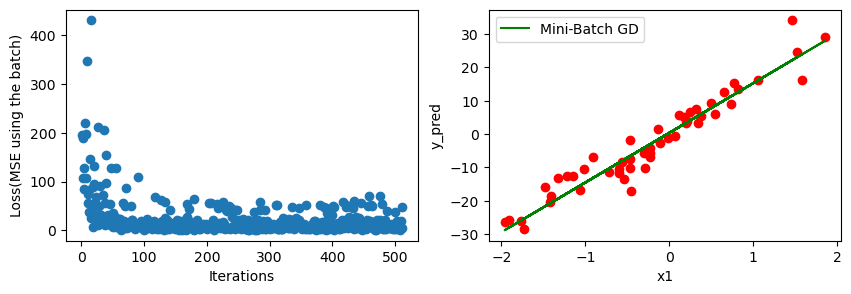

In [23]:
visualize_GD_result(result1)

sample_strategy: random_without_replacement
batch_size: 50
epochs: 30
iterations_per_epoch: 1
weights: [-0.21909971  6.70773321]
mse of the fitted line/hyperplane: 69.43707923767703
time_taken: 0.002015352249145508


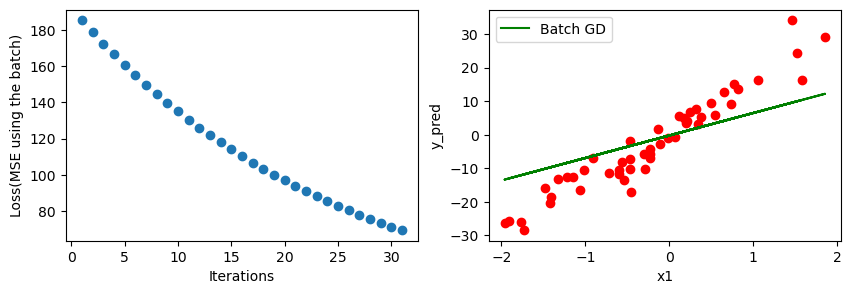

In [24]:
visualize_GD_result(result2)

sample_strategy: random_without_replacement
batch_size: 1
epochs: 30
iterations_per_epoch: 50
weights: [ 0.95957482 14.01213513]
mse of the fitted line/hyperplane: 15.492752139633287
time_taken: 0.17998933792114258


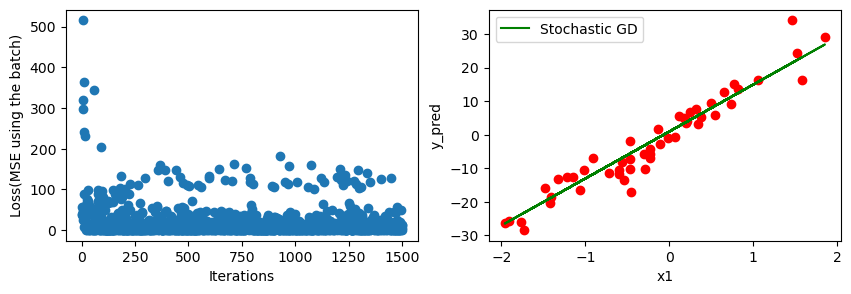

In [25]:
visualize_GD_result(result3)

### Using LinearRegression from sklearn to solve this regression problem:

In [26]:
linear_model = LinearRegression()

In [27]:
linear_model.fit(X, y)

LinearRegression()

In [28]:
linear_model.intercept_

0.6432035707147667

In [29]:
linear_model.coef_

array([14.63050412])

In [30]:
y_pred_lr = linear_model.predict(X)

In [31]:
mean_squared_error(y, y_pred_lr)

14.95833251807323

In [32]:
results = [result1, result2, result3, result4, result5, result6]
results_len = len(results)

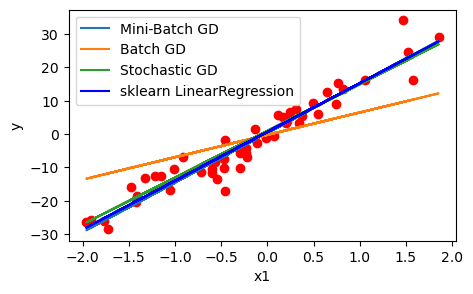

In [33]:
plt.figure(figsize=(5,3))
plt.scatter(x=X[:, 0], y=y, c='r')

for result in results[:3]: 
    plt.plot(X[:, 0], result['y_pred_gd'], label=result['gd_type'])
    
plt.plot(X[:, 0], y_pred_lr, c='b', label='sklearn LinearRegression')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

In [34]:
gradient_descent_types = [result['gd_type'] for result in results]
sample_strategy = [result['sample_strategy'] for result in results]
epochs = [result['epochs'] for result in results]
batch_sizes = [result['batch_size'] for result in results]
iterations_per_epoch = [result['iterations_per_epoch'] for result in results]
total_time_taken = [result['time_taken'] for result in results]
final_losses =  [result['losses'][-1] for result in results]
mse = [result['mse'] for result in results]

df = pd.DataFrame({'gradient_descent_type': gradient_descent_types, 
                   'sample_strategy': sample_strategy, 'epochs': epochs, 
                   'batch_size': batch_sizes, 
                   'iterations_per_epoch': iterations_per_epoch, 
                   'time_taken_seconds': total_time_taken, 'final_loss': final_losses, 
                   'mse': mse})
df

,gradient_descent_type,sample_strategy,epochs,batch_size,iterations_per_epoch,time_taken_seconds,final_loss,mse
0,Mini-Batch GD,random_without_replacement,30,3,17,0.043000,48.144379,15.124808
1,Batch GD,random_without_replacement,30,50,1,0.002015,69.437079,69.437079
2,Stochastic GD,random_without_replacement,30,1,50,0.179989,13.853909,15.492752
3,Mini-Batch GD,random_without_replacement,100,3,17,0.131979,52.281875,14.972131
4,Batch GD,random_without_replacement,100,50,1,0.005016,19.955053,19.955053
5,Stochastic GD,random_without_replacement,100,1,50,0.449988,16.508259,15.281329


### Key Observations:
For fixed number of epochs and fixed learning rate:
- The **final loss** value, obtained at the last iteration of the last epoch, converges faster for SGD, than that for Batch GD.
- For smaller datasets, Batch GD < Mini-Batch GD < SGD in terms of time taken.

In [35]:
# n - # data points in training dataset
# m number of input features
# If n=1000, m=6, epochs=30
n = 1000
m = 6
epochs = 30

# Number of derivatives to be computed in case of Linear Regression using MSE as loss function.

# In Batch GD:
(m+1)*n*epochs

210000

In [36]:
# In SGD:
(m+1)*1*n*epochs

210000

In [37]:
# In Mini-Batch GD:
batch_size = 50
(m+1)*np.ceil(n/batch_size)*epochs

4200.0

### Tracing out the trajectory took by Grdient Descent in the loss terrain during the parameter search:

In [38]:
# Todo: Draw a contour plot for the loss function corresponding to the given regression problem.

In [39]:
w0_values = np.linspace(-5,10,100)
w1_values = np.linspace(-5,25,100)

In [40]:
def mse_loss(w0, w1, X, y):
    X1 = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_pred = w0 * X1[:, 0] + w1 * X1[:, 1]
    return mean_squared_error(y, y_pred)

In [41]:
# create_loss_terrain(w0_values, w1_values, X, y, loss_func): Computes the loss for different 
# combinations of weight vector to synthesize the loss terrain.

# Parameters:

# X: design matrix corresponding to training dataset

# y: a vector of response values corresponding to training dataset

# w0_values: Range of first parameter values used while creating the loss terrain. In case of 
# Linear Regression w0_values are the intercept values.

# w1_values: Range of second parameter values used while creating the loss terrain. In case of 
# Linear Regression w1_values are the slope values.

# loss_func is the function which uses X, y, and the parameter values to calculate the loss.

# Returns: loss_terrain(list)
def create_loss_terrain(w0_values, w1_values, X, y, loss_func):
    
    # Create a multidimensional array to represent the loss terrain and intalize it with zeros.
    loss_terrain = np.zeros((len(w0_values), len(w1_values)))
    loss_terrain
    
    # Compute the loss for different combinations of weight vector to synthesize the loss terrain.
    for i, w1 in enumerate(w1_values):
        for j, w0 in enumerate(w0_values):
                result = loss_func(w0, w1, X, y)
                loss_terrain[i, j] = result
    return loss_terrain

In [42]:
loss_terrain = create_loss_terrain(w0_values, w1_values, X, y, mse_loss)

In [43]:
weights_cal_arr = np.array(result1['weights_cal'])
weights_cal_arr.shape

(30, 17, 2)

In [44]:
all_weights = weights_cal_arr.reshape(30*17,2)
all_weights.shape

(510, 2)

In [45]:
# Note: Use show_path_took_by_gd(w0_values, w1_values, loss_terrain, gd_result, 
# smooth_trajectory=False) function only when the loss function  has 2 parameters.

# This function creates a contour plot representing the loss terrain. It 
# then superimposes the path taken by the Gradient Descent algorithm on this 
# loss terrain.

# w0_values: Range of intercept values used while creating the loss terrain.
# w1_values: Range of slope values used while creating the loss terrain.
# loss_terrain: a list containing loss values for different combinations of the paramater values.
# gd_result: The object returned by the fit_best_line_using_GD().
# smooth_trajectory: True means the weight values obtained at the start of each epoch would be 
# considered to get a smoother trajectory of the parameter search.

def show_path_took_by_gd(w0_values, w1_values, loss_terrain, gd_result, smooth_trajectory=False):
    plt.figure(figsize=(5,5))

    contour_f1 = plt.contour(w0_values, w1_values, loss_terrain, levels=15)
    plt.clabel(contour_f1, fontsize=8)
    
    weights_cal_arr = np.array(gd_result['weights_cal'])
    
    if smooth_trajectory:
        all_weights = (weights_cal_arr.reshape(weights_cal_arr.shape[0]*weights_cal_arr.shape[1], 2)
                   [::gd_result['iterations_per_epoch']])
    else:
        all_weights = weights_cal_arr.reshape(weights_cal_arr.shape[0]*weights_cal_arr.shape[1], 2)

    plt.plot(all_weights[:, 0] , all_weights[:, 1], color='g')
    
    # Initial starting point
    plt.scatter(x=gd_result['weights_initial'][0], y=gd_result['weights_initial'][1], c='r')

    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title(f"Path took by {gd_result['gd_type']}")

    plt.show()

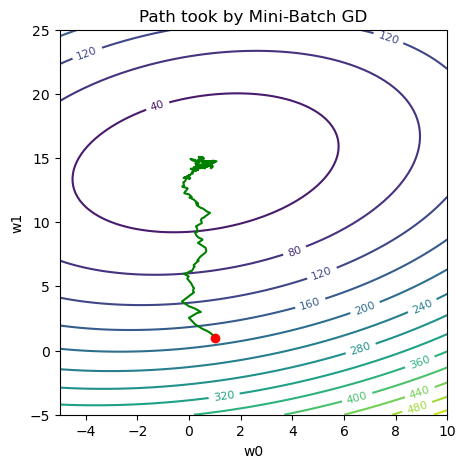

In [46]:
show_path_took_by_gd(w0_values, w1_values, loss_terrain, result1)

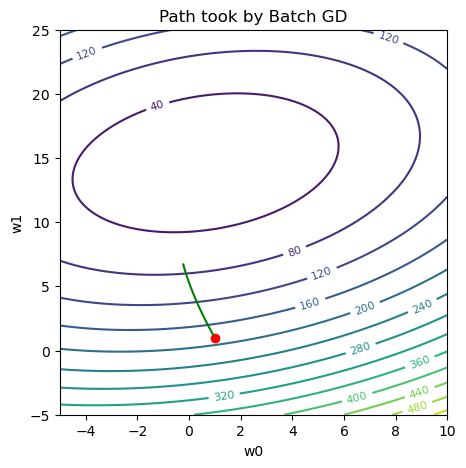

In [47]:
show_path_took_by_gd(w0_values, w1_values, loss_terrain, result2)

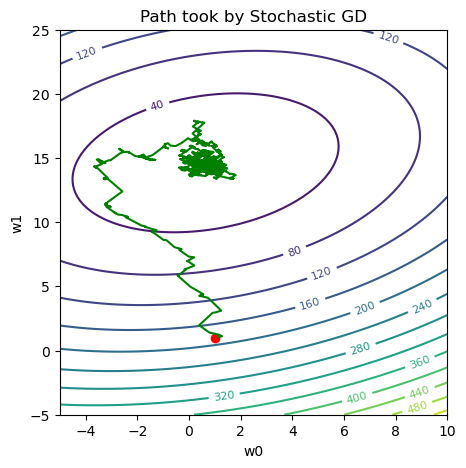

In [48]:
show_path_took_by_gd(w0_values, w1_values, loss_terrain, result3)

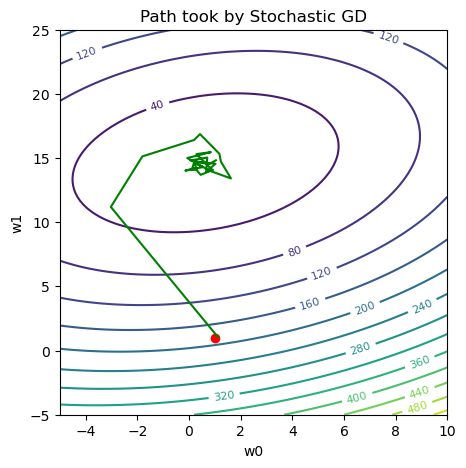

In [49]:
show_path_took_by_gd(w0_values, w1_values, loss_terrain, result3, smooth_trajectory=True)